In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
data_dir = r'C:\Users\elbai\PycharmProjects\West_Coast_Regional_Datathon_2020\data'

In [7]:
data_dir = "D:\\Downloads\\citadel-datathon-fall-2020"

In [3]:
data_dir = r'C:\Users\CHAN\Documents\Datathon'

In [4]:
movie_df = pd.read_csv(data_dir + '/movie_lense/movies.csv')
movie_df = movie_df[movie_df.genres != '(no genres listed)']
movie_genres = list(movie_df.genres.str.split("|").explode().unique())
# list of genres
movie_df = pd.concat([movie_df.drop('genres', axis=1), movie_df.genres.str.get_dummies(sep='|')], axis=1)
movie_df['title'] = movie_df['title'].str.split('(').str[0].str.strip()
movie_df.head(10)
#Delete movies without genres, and used one hot encoding

movieId                        title  Action  Adventure  Animation  \
0        1                    Toy Story       0          1          1   
1        2                      Jumanji       0          1          0   
2        3             Grumpier Old Men       0          0          0   
3        4            Waiting to Exhale       0          0          0   
4        5  Father of the Bride Part II       0          0          0   
5        6                         Heat       1          0          0   
6        7                      Sabrina       0          0          0   
7        8                 Tom and Huck       0          1          0   
8        9                 Sudden Death       1          0          0   
9       10                    GoldenEye       1          1          0   

   Children  Comedy  Crime  Documentary  Drama  ...  Film-Noir  Horror  IMAX  \
0         1       1      0            0      0  ...          0       0     0   
1         1       0      0            0      0  ...          0       0     0   
2         0       1      0            0      0  ...          0       0     0   
3         0       1      0            0      1  ...          0       0     0   
4         0       1      0            0      0  ...          0       0     0   
5         0       0      1            0      0  ...          0       0     0   
6         0       1      0            0      0  ...          0       0     0   
7         1       0      0            0      0  ...          0       0     0   
8         0       0      0            0      0  ...          0       0     0   
9         0       0      0            0      0  ...          0       0     0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         0    0        0  
2        0        0        1       0         0    0        0  
3        0        0        1       0         0    0        0  
4        0        0        0       0         0    0        0  
5        0        0        0       0         1    0        0  
6        0        0        1       0         0    0        0  
7        0        0        0       0         0    0        0  
8        0        0        0       0         0    0        0  
9        0        0        0       0         1    0        0  

[10 rows x 21 columns]

In [5]:
from datetime import datetime
dt_parser = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%d/%m/%Y %H:%M:%S")

rating_df = pd.read_csv(data_dir + '/movie_lense/ratings.csv', parse_dates=['timestamp'],  date_parser=dt_parser)
rating_df.head(10)
rating_df.describe()

KeyboardInterrupt: 

In [5]:
from datetime import datetime
dt_parser = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%d/%m/%Y %H:%M:%S")

tag_df = pd.read_csv(data_dir + '/movie_lense/tags.csv', parse_dates=['timestamp'],  date_parser=dt_parser)
tag_df.head(10)
tag_df.describe()

userId       movieId
count  1.108997e+06  1.108997e+06
mean   1.248016e+05  5.492109e+04
std    7.726964e+04  5.618123e+04
min    1.400000e+01  1.000000e+00
25%    7.340600e+04  3.362000e+03
50%    1.030130e+05  4.374400e+04
75%    1.883600e+05  9.682100e+04
max    2.832210e+05  1.938680e+05

In [6]:
tag_df

userId  movieId                 tag           timestamp
0            14      110                epic 2015-09-25 02:35:38
1            14      110            Medieval 2015-09-25 02:35:32
2            14      260              sci-fi 2015-09-13 18:36:50
3            14      260        space action 2015-09-13 18:37:01
4            14      318        imdb top 250 2015-09-18 22:26:35
...         ...      ...                 ...                 ...
1108992  283206    73017                 fun 2010-01-25 00:24:19
1108993  283206    73017  homoerotic subtext 2010-01-25 00:24:18
1108994  283206    73017              pacing 2010-01-25 00:24:18
1108995  283206    73017                plot 2010-01-25 00:24:18
1108996  283221    49651  Sylvester Stallone 2007-09-01 12:47:10

[1108997 rows x 4 columns]

In [7]:
#can use set if required
ntag_df = tag_df.groupby('movieId').agg(lambda x: x.tolist()).drop(['userId', 'timestamp'],axis=1)
# tag_count = tag_df['tag'].value_counts()
ntag_df

tag
movieId                                                   
1        [animated, buddy movie, Cartoon, cgi, comedy, ...
2        [fantasy, adapted from:book, animals, bad cgi,...
3        [moldy, old, Ann Margaret, Burgess Meredith, D...
4        [characters, girl movie, characters, chick fli...
5        [steve martin, steve martin, pregnancy, remake...
...                                                    ...
193761   [concert, hostage, kidnapping, opera singer, r...
193811                         [doppelganger, Julie Delpy]
193837          [aliens, anime, cat, space marines, virus]
193864   [Alfredo Landa, anticonception, comic, family,...
193868   [black and white, comedy, friendship, fun, mar...

[45981 rows x 1 columns]

In [8]:
oscar_df = pd.read_csv(data_dir + '/the_oscar_award.csv', encoding='latin-1',engine='python')
oscar_df
oscar_df.describe()

year_film  year_ceremony      ceremony
count  10395.000000   10395.000000  10395.000000
mean    1974.474555    1975.474555     47.500144
std       26.145642      26.145642     26.102352
min     1927.000000    1928.000000      1.000000
25%     1951.000000    1952.000000     24.000000
50%     1974.000000    1975.000000     47.000000
75%     1998.000000    1999.000000     71.000000
max     2019.000000    2020.000000     92.000000

In [9]:
industry_df = pd.read_csv(data_dir + '/movie_industry.csv', encoding='latin-1',engine='python')
industry_df.released = pd.to_datetime(industry_df.released, infer_datetime_format=True)
industry_df = industry_df[industry_df.budget != 0.0]
industry_df = industry_df[industry_df.votes > 1000]
#remove without budget_info
industry_df.describe()

budget         gross      runtime        score         votes  \
count  4.610000e+03  4.610000e+03  4610.000000  4610.000000  4.610000e+03   
mean   3.629965e+07  4.634142e+07   107.649241     6.361085  9.627969e+04   
std    4.003567e+07  6.640595e+07    18.053799     1.010176  1.496566e+05   
min    6.000000e+03  3.090000e+02    69.000000     1.500000  1.008000e+03   
25%    1.000000e+07  6.509935e+06    96.000000     5.800000  1.639525e+04   
50%    2.300000e+07  2.400017e+07   104.000000     6.400000  4.428000e+04   
75%    4.700000e+07  5.804627e+07   117.000000     7.100000  1.101975e+05   
max    3.000000e+08  9.366622e+08   280.000000     9.300000  1.861666e+06   

              year  
count  4610.000000  
mean   2002.565510  
std       8.426275  
min    1986.000000  
25%    1996.000000  
50%    2003.000000  
75%    2010.000000  
max    2016.000000

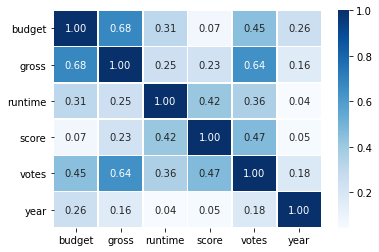

In [10]:
#correlation between each field of industry_df
sns.heatmap(data = industry_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

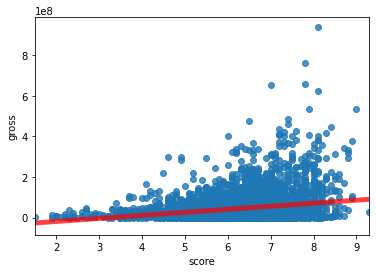

In [11]:
sns.regplot(x=industry_df["score"], y=industry_df["gross"], line_kws={"color":"r","alpha":0.7,"lw":5})

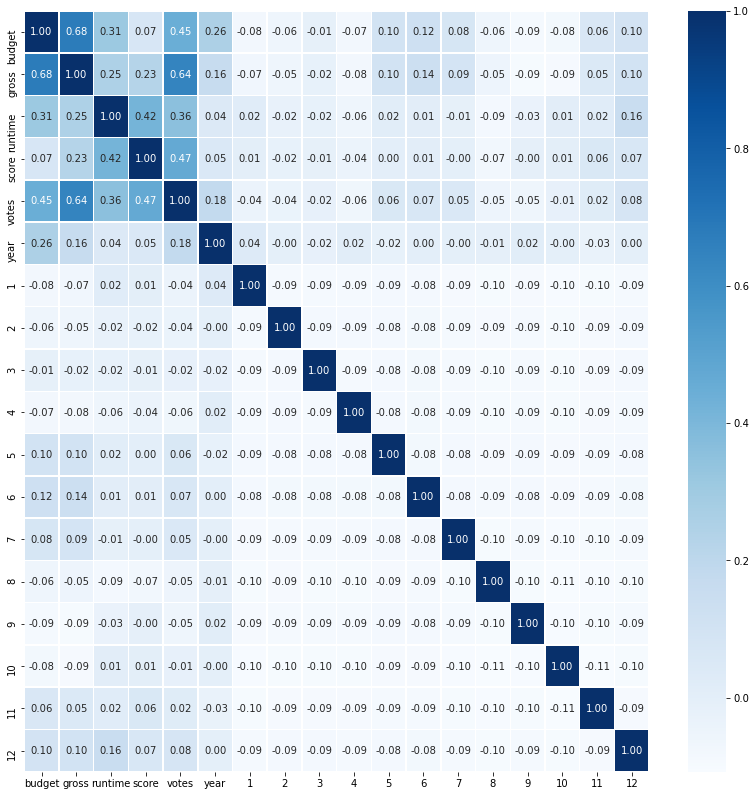

In [12]:
industry_months_df = pd.concat([industry_df, pd.get_dummies(industry_df.released.dt.month)], axis=1)
_, ax = plt.subplots(figsize=(14,14)) 
sns.heatmap(data = industry_months_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues', ax=ax)
#shows correlations between month of release and score etc.

              Series ID  Year Period  Value
Label                                      
1913-01-01  CUUR0000SA0  1913    M01    9.8
1913-02-01  CUUR0000SA0  1913    M02    9.8
1913-03-01  CUUR0000SA0  1913    M03    9.8
1913-04-01  CUUR0000SA0  1913    M04    9.8
1913-05-01  CUUR0000SA0  1913    M05    9.7
1913-06-01  CUUR0000SA0  1913    M06    9.8
1913-07-01  CUUR0000SA0  1913    M07    9.9
1913-08-01  CUUR0000SA0  1913    M08    9.9
1913-09-01  CUUR0000SA0  1913    M09   10.0
1913-10-01  CUUR0000SA0  1913    M10   10.0
       budget                                  company country  \
0   8000000.0            Columbia Pictures Corporation     USA   
1   6000000.0                       Paramount Pictures     USA   
2  15000000.0                       Paramount Pictures     USA   
3  18500000.0   Twentieth Century Fox Film Corporation     USA   
4   9000000.0                     Walt Disney Pictures     USA   
5   6000000.0                                  Hemdale      UK   
6  2500000

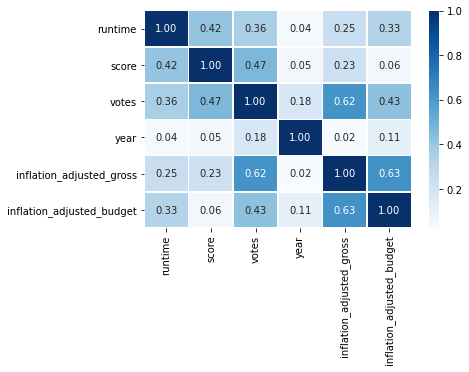

In [13]:
cpi_df = pd.read_csv(data_dir + '/cpi.csv')
cpi_df['Label'] = pd.to_datetime(cpi_df.Label, infer_datetime_format=True)
cpi_df.set_index('Label', inplace=True)
print(cpi_df.head(10))

cpi_aug_2020 = cpi_df.loc[pd.to_datetime('2020-08-01')]['Value']

def correct_for_inflation(timestamp, amount):
    #convert to 'todays's money'
    return cpi_aug_2020/cpi_df.loc[timestamp.replace(day=1)]['Value']*amount

def adjust_gross(movie):
    return correct_for_inflation(movie.released, movie.gross)

def adjust_budget(movie):
    return correct_for_inflation(movie.released, movie.budget)

industry_df['inflation_adjusted_gross'] = industry_df.apply(adjust_gross, axis=1)
industry_df['inflation_adjusted_budget'] = industry_df.apply(adjust_budget, axis=1)
print(industry_df.head(10))
    
sns.heatmap(data = industry_df.drop(['gross', 'budget'], axis=1).corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [73]:
nindustry_df = industry_df.drop(['gross', 'budget','star','writer','company','country','director','released'],axis=1)
nindustry_df = nindustry_df.query("rating not in ['Not specified', 'NOT RATED', 'UNRATED']")
nindustry_df = pd.get_dummies(nindustry_df, columns = ['rating'])
nindustry_df = nindustry_df.add_prefix('input_')
nindustry_df

input_genre                                 input_name  input_runtime  \
0      Adventure                                Stand by Me             89   
1         Comedy                   Ferris Bueller's Day Off            103   
2         Action                                    Top Gun            110   
3         Action                                     Aliens            137   
4      Adventure                    Flight of the Navigator             90   
...          ...                                        ...            ...   
6808      Comedy                          Love & Friendship             90   
6809      Comedy                                The Hollars             88   
6811   Animation  Middle School: The Worst Years of My Life             92   
6814      Action                                      Risen            107   
6817   Animation                   Batman: The Killing Joke             76   

      input_score  input_votes  input_year  input_inflation_adjusted_gross  \
0             8.1       299174        1986                    1.238873e+08   
1             7.8       264740        1986                    1.664813e+08   
2             6.9       236909        1986                    4.291406e+08   
3             8.4       540152        1986                    2.021432e+08   
4             6.9        36636        1986                    4.398612e+07   
...           ...          ...         ...                             ...   
6808          6.5        17862        2016                    1.511247e+07   
6809          6.5         7227        2016                    1.097382e+06   
6811          6.1         4556        2016                    2.148899e+07   
6814          6.3        19084        2016                    4.042162e+07   
6817          6.5        36333        2016                    4.077624e+06   

      input_inflation_adjusted_budget  input_rating_G  input_rating_NC-17  \
0                        1.895482e+07               0                   0   
1                        1.424208e+07               0                   0   
2                        3.580138e+07               0                   0   
3                        4.391309e+07               0                   0   
4                        2.132418e+07               0                   0   
...                               ...             ...                 ...   
6808                     3.235252e+06               0                   0   
6809                     4.100862e+06               0                   0   
6811                     9.139586e+06               0                   0   
6814                     2.192374e+07               0                   0   
6817                     3.780578e+06               0                   0   

      input_rating_PG  input_rating_PG-13  input_rating_R  
0                   0                   0               1  
1                   0                   1               0  
2                   1                   0               0  
3                   0                   0               1  
4                   1                   0               0  
...               ...                 ...             ...  
6808                1                   0               0  
6809                0                   1               0  
6811                1                   0               0  
6814                0                   1               0  
6817                0                   0               1  

[4550 rows x 13 columns]

In [74]:
nntag_df = ntag_df.merge(movie_df, how="left", on="movieId")
ftag_df = nindustry_df.merge(nntag_df, how="left", left_on="input_name", right_on="title")
ftag_df = ftag_df.drop('input_genre',axis=1)
# ftag_df.iloc[0]
# print(ftag_df[ftag_df.Horror==1.0].describe())
# ftag_df[ftag_df.Horror==1.0][ftag_df.score>7.1]['tag']
ftag_df

input_name  input_runtime  input_score  \
0                                   Stand by Me             89          8.1   
1                      Ferris Bueller's Day Off            103          7.8   
2                                       Top Gun            110          6.9   
3                                        Aliens            137          8.4   
4                       Flight of the Navigator             90          6.9   
...                                         ...            ...          ...   
5231                                The Hollars             88          6.5   
5232  Middle School: The Worst Years of My Life             92          6.1   
5233                                      Risen            107          6.3   
5234                                      Risen            107          6.3   
5235                   Batman: The Killing Joke             76          6.5   

      input_votes  input_year  input_inflation_adjusted_gross  \
0          299174        1986                    1.238873e+08   
1          264740        1986                    1.664813e+08   
2          236909        1986                    4.291406e+08   
3          540152        1986                    2.021432e+08   
4           36636        1986                    4.398612e+07   
...           ...         ...                             ...   
5231         7227        2016                    1.097382e+06   
5232         4556        2016                    2.148899e+07   
5233        19084        2016                    4.042162e+07   
5234        19084        2016                    4.042162e+07   
5235        36333        2016                    4.077624e+06   

      input_inflation_adjusted_budget  input_rating_G  input_rating_NC-17  \
0                        1.895482e+07               0                   0   
1                        1.424208e+07               0                   0   
2                        3.580138e+07               0                   0   
3                        4.391309e+07               0                   0   
4                        2.132418e+07               0                   0   
...                               ...             ...                 ...   
5231                     4.100862e+06               0                   0   
5232                     9.139586e+06               0                   0   
5233                     2.192374e+07               0                   0   
5234                     2.192374e+07               0                   0   
5235                     3.780578e+06               0                   0   

      input_rating_PG  ...  Film-Noir  Horror  IMAX Musical Mystery  Romance  \
0                   0  ...        0.0     0.0   0.0     0.0     0.0      0.0   
1                   0  ...        0.0     0.0   0.0     0.0     0.0      0.0   
2                   1  ...        0.0     0.0   0.0     0.0     0.0      1.0   
3                   0  ...        0.0     1.0   0.0     0.0     0.0      0.0   
4                   1  ...        0.0     0.0   0.0     0.0     0.0      0.0   
...               ...  ...        ...     ...   ...     ...     ...      ...   
5231                0  ...        0.0     0.0   0.0     0.0     0.0      0.0   
5232                1  ...        0.0     0.0   0.0     0.0     0.0      0.0   
5233                0  ...        0.0     0.0   0.0     0.0     0.0      0.0   
5234                0  ...        0.0     0.0   0.0     0.0     0.0      0.0   
5235                0  ...        0.0     0.0   0.0     0.0     0.0      0.0   

      Sci-Fi  Thriller  War  Western  
0        0.0       0.0  0.0      0.0  
1        0.0       0.0  0.0      0.0  
2        0.0       0.0  0.0      0.0  
3        1.0       0.0  0.0      0.0  
4        1.0       0.0  0.0      0.0  
...      ...       ...  ...      ...  
5231     0.0       0.0  0.0      0.0  
5232     0.0       0.0  0.0      0.0  
5233     0.0       0.0  0.0      0.0  
5234     0.0       0.0  0.0    

In [75]:
#First I will look at Adventure Genre
ftag_df_adv = ftag_df[ftag_df.Adventure == 1.0]
tag_list= []
for x in ftag_df_adv['tag']:
    tag_list.extend(x)
# print(tag_list)

from collections import Counter
ctag = Counter(tag_list)
top_tags= [k for k, v in sorted(ctag.items(), key=lambda item: item[1], reverse=True) if v>=100]

In [81]:
tagged_movies = pd.get_dummies(tag_df[tag_df['tag'].isin(top_tags)][['movieId', 'tag']], columns=['tag']).groupby('movieId').max()
movies_with_tags = ftag_df_adv.merge(tagged_movies, how="left", on='movieId')
movies_with_tags = movies_with_tags.drop('input_name',axis=1)
movies_with_tags.replace([np.inf, -np.inf], np.nan, inplace=True)
y = movies_with_tags.filter(regex='tag_')
X = movies_with_tags.filter(regex='input_')


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False F

In [58]:
from ml import run
import classifiers
import preprocessors as preprocessors

run(np.array(X),np.array(y))

NameError: name 'classifiers' is not defined